In [1]:
sample_space = {'Heads', 'Tails'}
probability_heads = 1 / len(sample_space)
print(f'Probability of choosing heads is {probability_heads}')

Probability of choosing heads is 0.5


In [2]:
def is_heads_or_tails(outcome):  return outcome in {'Heads', 'Tails'}
def is_neither(outcome): return not is_heads_or_tails(outcome)
def is_heads(outcome): return outcome == 'Heads'
def is_tails(outcome): return outcome == 'Tails'

def get_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space
                if event_condition(outcome)])

In [3]:
event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]

for event_condition in event_conditions:
    print(f"Event Condition: {event_condition.__name__}")
    event = get_event(event_condition, sample_space)
    print(f'Event: {event}\n')

Event Condition: is_heads_or_tails
Event: {'Heads', 'Tails'}

Event Condition: is_heads
Event: {'Heads'}

Event Condition: is_tails
Event: {'Tails'}

Event Condition: is_neither
Event: set()



In [4]:
def compute_probability(event_condition, generic_sample_space):
    event = get_event(event_condition, generic_sample_space)
    return len(event) / len(generic_sample_space)

for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.5
Probability of event arising from 'is_tails' is 0.5
Probability of event arising from 'is_neither' is 0.0


<h2>1.1.1 Biased coin

In [5]:
weighted_sample_space = {'Heads': 4, 'Tails': 1}
sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5
event = get_event(is_heads_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert event_size == 5

In [6]:
def compute_event_probability(event_condition, generic_sample_space):
    event = get_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)

    event_size = sum(generic_sample_space[outcome]
                     for outcome in event)
    return event_size / sum(generic_sample_space.values())

In [7]:
for event_condition in event_conditions:
    prob = compute_event_probability(event_condition, weighted_sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.8
Probability of event arising from 'is_tails' is 0.2
Probability of event arising from 'is_neither' is 0.0


<h2>1.2.1 family with 4 children

In [8]:
possible_children = ['Boy', 'Girl']
sample_space = set()
for child1 in possible_children:
    for child2 in possible_children:
        for child3 in possible_children:
            for child4 in possible_children:
                outcome = (child1, child2, child3, child4)
                sample_space.add(outcome)

In [9]:
from itertools import product
all_combinations = product(*(4 * [possible_children]))
assert set(all_combinations) == sample_space

In [10]:
sample_space

{('Boy', 'Boy', 'Boy', 'Boy'),
 ('Boy', 'Boy', 'Boy', 'Girl'),
 ('Boy', 'Boy', 'Girl', 'Boy'),
 ('Boy', 'Boy', 'Girl', 'Girl'),
 ('Boy', 'Girl', 'Boy', 'Boy'),
 ('Boy', 'Girl', 'Boy', 'Girl'),
 ('Boy', 'Girl', 'Girl', 'Boy'),
 ('Boy', 'Girl', 'Girl', 'Girl'),
 ('Girl', 'Boy', 'Boy', 'Boy'),
 ('Girl', 'Boy', 'Boy', 'Girl'),
 ('Girl', 'Boy', 'Girl', 'Boy'),
 ('Girl', 'Boy', 'Girl', 'Girl'),
 ('Girl', 'Girl', 'Boy', 'Boy'),
 ('Girl', 'Girl', 'Boy', 'Girl'),
 ('Girl', 'Girl', 'Girl', 'Boy'),
 ('Girl', 'Girl', 'Girl', 'Girl')}

In [11]:
sample_space_efficient = set(product(possible_children, repeat=4))
assert sample_space == sample_space_efficient

In [12]:
sample_space_efficient

{('Boy', 'Boy', 'Boy', 'Boy'),
 ('Boy', 'Boy', 'Boy', 'Girl'),
 ('Boy', 'Boy', 'Girl', 'Boy'),
 ('Boy', 'Boy', 'Girl', 'Girl'),
 ('Boy', 'Girl', 'Boy', 'Boy'),
 ('Boy', 'Girl', 'Boy', 'Girl'),
 ('Boy', 'Girl', 'Girl', 'Boy'),
 ('Boy', 'Girl', 'Girl', 'Girl'),
 ('Girl', 'Boy', 'Boy', 'Boy'),
 ('Girl', 'Boy', 'Boy', 'Girl'),
 ('Girl', 'Boy', 'Girl', 'Boy'),
 ('Girl', 'Boy', 'Girl', 'Girl'),
 ('Girl', 'Girl', 'Boy', 'Boy'),
 ('Girl', 'Girl', 'Boy', 'Girl'),
 ('Girl', 'Girl', 'Girl', 'Boy'),
 ('Girl', 'Girl', 'Girl', 'Girl')}

In [13]:
def has_two_boys(outcome): return len([child for child in outcome
                                      if child == 'Boy']) == 2

prob = compute_event_probability(has_two_boys, sample_space)
print(f"Probability of 2 boys is {prob}")

Probability of 2 boys is 0.375


<h2>1.2.2 multiple dice rolls</h2>

In [14]:
possible_rolls = list(range(1, 7))
print(possible_rolls)

[1, 2, 3, 4, 5, 6]


In [15]:
sample_space = set(product(possible_rolls, repeat=6))

In [16]:
sample_space

{(3, 4, 4, 4, 4, 2),
 (5, 3, 2, 2, 3, 2),
 (5, 4, 6, 6, 6, 2),
 (6, 3, 1, 4, 6, 6),
 (3, 2, 3, 3, 4, 5),
 (3, 2, 2, 4, 4, 1),
 (4, 1, 6, 1, 5, 5),
 (6, 1, 5, 5, 3, 2),
 (1, 5, 2, 6, 2, 5),
 (6, 5, 5, 5, 2, 4),
 (6, 6, 2, 4, 5, 6),
 (6, 6, 6, 4, 4, 3),
 (3, 2, 5, 4, 6, 3),
 (3, 6, 3, 2, 6, 5),
 (1, 6, 5, 6, 3, 5),
 (6, 4, 3, 4, 1, 1),
 (4, 3, 2, 6, 4, 1),
 (2, 6, 4, 4, 3, 1),
 (2, 2, 2, 2, 2, 4),
 (5, 4, 4, 2, 5, 2),
 (5, 1, 6, 2, 5, 3),
 (6, 3, 4, 3, 1, 6),
 (5, 3, 1, 2, 6, 3),
 (2, 2, 4, 4, 1, 2),
 (1, 3, 5, 2, 5, 5),
 (6, 2, 2, 2, 2, 2),
 (3, 1, 2, 6, 5, 6),
 (2, 4, 5, 2, 3, 4),
 (5, 2, 1, 1, 2, 2),
 (2, 6, 4, 3, 6, 1),
 (3, 3, 5, 2, 2, 1),
 (1, 4, 1, 3, 3, 5),
 (3, 6, 2, 5, 3, 4),
 (6, 3, 6, 4, 3, 4),
 (5, 1, 1, 5, 2, 4),
 (3, 1, 6, 6, 2, 4),
 (4, 6, 1, 5, 1, 2),
 (5, 5, 6, 4, 4, 6),
 (1, 3, 4, 5, 6, 2),
 (4, 1, 5, 1, 3, 2),
 (6, 1, 2, 4, 4, 1),
 (6, 3, 5, 2, 5, 5),
 (3, 3, 5, 4, 6, 6),
 (2, 2, 3, 4, 5, 6),
 (2, 5, 1, 4, 2, 4),
 (3, 3, 3, 1, 6, 2),
 (4, 6, 5, 2, 1, 6),
 (1, 1, 3, 3,

In [17]:
def has_sum_of_21(outcome): return sum(outcome) == 21

prob = compute_event_probability(has_sum_of_21, sample_space)
print(f"Probability of dice summing to 21 is {prob}")

Probability of dice summing to 21 is 0.09284979423868313


In [18]:
prob = compute_event_probability(lambda x: sum(x) == 21, sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)

In [19]:
from collections import defaultdict
weighted_sample_space = defaultdict(int)
for outcome in sample_space:
    total = sum(outcome)
    weighted_sample_space[total] += 1

In [20]:
assert weighted_sample_space[6] == 1
assert weighted_sample_space[36] == 1


In [21]:
weighted_sample_space[22]

4221

In [22]:
6*6*6*6*6*6

46656

In [23]:
event = get_event(lambda x: sum(x) == 21, sample_space)
assert weighted_sample_space[21] == len(event)
assert sum(weighted_sample_space.values()) == len(sample_space)

In [24]:
prob = compute_event_probability(lambda x: x == 21,
                                 weighted_sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)
print(f"Probability of dice summing to 21 is {prob}")

Probability of dice summing to 21 is 0.09284979423868313


In [25]:
print('Number of Elements in Unweighted Sample Space:')
print(len(sample_space))
print('Number of Elements in Weighted Sample Space:')
print(len(weighted_sample_space))

Number of Elements in Unweighted Sample Space:
46656
Number of Elements in Weighted Sample Space:
31


<h1>1.3 probabilities over interval ranges</h1>

In [26]:
def is_in_interval(number, minimum, maximum):
    return minimum <= number <= maximum

In [27]:
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21),
                                 weighted_sample_space)
print(f"Probability of interval is {prob}")

Probability of interval is 0.5446244855967078


In [28]:
def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Heads', 'Tails'], repeat=num_flips):
        heads_count = len([outcome for outcome in coin_flips
                          if outcome == 'Heads'])
        weighted_sample_space[heads_count] += 1

    return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()
assert weighted_sample_space[10] == 1
assert weighted_sample_space[9] == 10

In [29]:
weighted_sample_space.values()

dict_values([1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1])

In [30]:
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10),
                                 weighted_sample_space)
print(f"Probability of observing more than 7 heads is {prob}")

Probability of observing more than 7 heads is 0.0546875


In [31]:
56/sum(weighted_sample_space.values())

0.0546875

In [32]:
sum([1,2], 3) 

6

In [33]:
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7),
                                 weighted_sample_space)
print(f"Probability of observing more than 7 heads or 7 tails is {prob}")

Probability of observing more than 7 heads or 7 tails is 0.109375


In [34]:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15),
                                 weighted_sample_space_20_flips)
print(f"Probability of observing more than 15 heads or 15 tails is {prob}")

Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


In [35]:
sum(weighted_sample_space_20_flips.values())

1048576

<h1> Chapter 2, Matplotlib

<h2> 2.1 Basic plots

In [36]:
import matplotlib.pyplot as plt

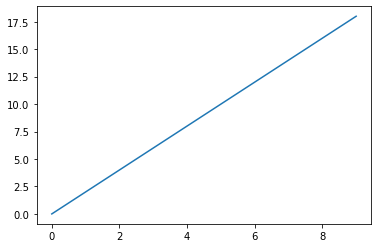

In [37]:
x = range(0, 10)
y = [2 * value for value in x]
plt.plot(x, y)
plt.show()

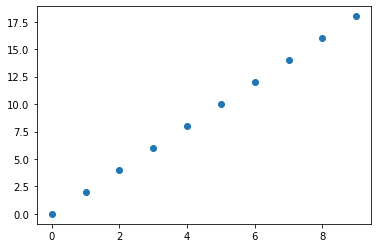

In [38]:
plt.scatter(x, y)
plt.show()

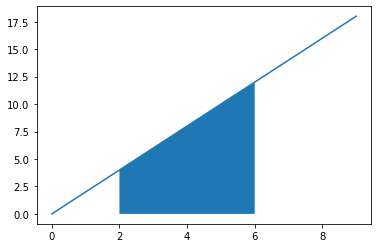

In [39]:
plt.plot(x, y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x, y, where=where)
plt.show()

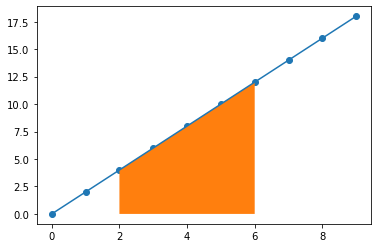

In [40]:
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x, y, where=where)
plt.show()

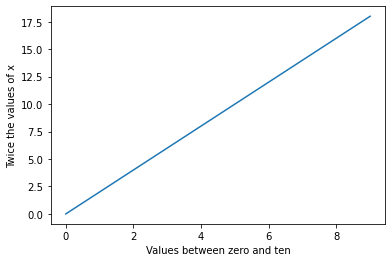

In [41]:
plt.plot(x, y)
plt.xlabel('Values between zero and ten')
plt.ylabel('Twice the values of x')
plt.show()

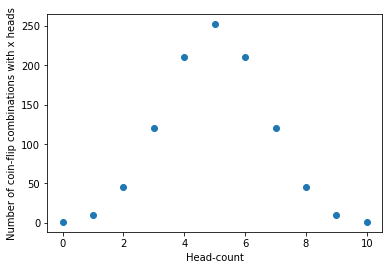

In [42]:
x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Number of coin-flip combinations with x heads')
plt.show()

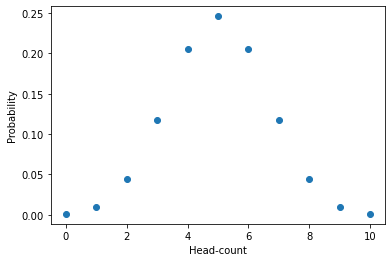

In [43]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [44]:
assert sum(prob_x_10_flips) == 1.0

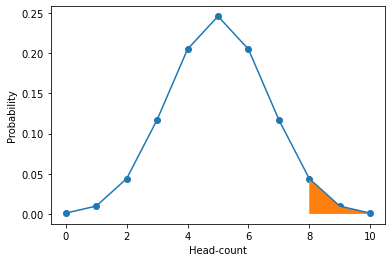

In [45]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

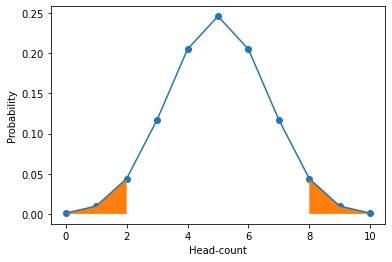

In [46]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

In [47]:
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]

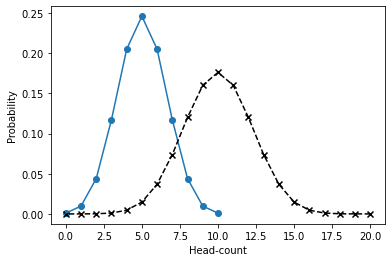

In [48]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
plt.plot(x_20_flips, prob_x_20_flips, color='black', linestyle='--')
plt.scatter(x_20_flips, prob_x_20_flips, color='k', marker='x')
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

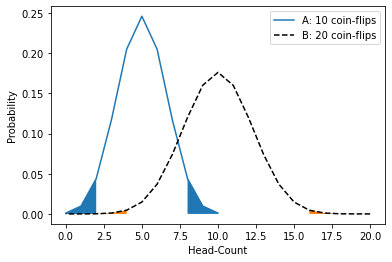

In [49]:
plt.plot(x_10_flips, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_flips, prob_x_20_flips, color='k', linestyle='--',
         label='B: 20 coin-flips')
plt.legend()

where_10 = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where_10)
where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips, prob_x_20_flips, where=where_20)

plt.xlabel('Head-Count')
plt.ylabel('Probability')
plt.show()

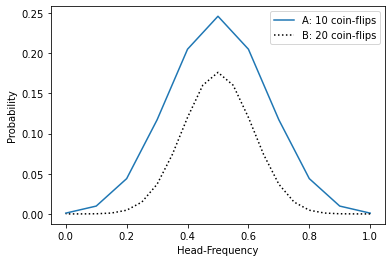

In [50]:
x_10_frequencies = [head_count /10 for head_count in x_10_flips]
x_20_frequencies = [head_count /20 for head_count in x_20_flips]

plt.plot(x_10_frequencies, prob_x_10_flips, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, prob_x_20_flips, color='k', linestyle=':', label='B: 20 coin-flips')
plt.legend()

plt.xlabel('Head-Frequency')
plt.ylabel('Probability')
plt.show()

In [51]:
relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

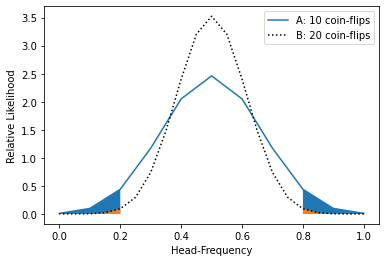

In [52]:
plt.plot(x_10_frequencies, relative_likelihood_10, label='A: 10 coin-flips')
plt.plot(x_20_frequencies, relative_likelihood_20, color='k',
         linestyle=':', label='B: 20 coin-flips')

plt.fill_between(x_10_frequencies, relative_likelihood_10, where=where_10)
plt.fill_between(x_20_frequencies, relative_likelihood_20, where=where_20)

plt.legend()
plt.xlabel('Head-Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

<h1>Chapter 3 - NumPy</h1>
<h2>3.1 Simulating random coin-flips</h2>

In [53]:
import numpy as np

In [54]:
dice_roll = np.random.randint(1, 7)
assert 1 <= dice_roll <= 6

In [55]:
dice_roll

6

In [56]:
np.random.seed(0)
dice_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert dice_rolls == [5, 6, 1]

In [57]:
np.random.seed(0)
coin_flip = np.random.randint(0, 2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


In [58]:
np.random.seed(0)
coin_flip = np.random.randint(0, 2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


In [59]:
np.random.seed(0)
def frequency_heads(coin_flip_sequence):
    total_heads = sum(coin_flip_sequence)
    return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


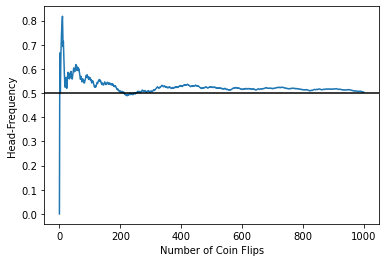

In [60]:
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0, 2))
    frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(.5, color='k')
plt.xlabel('Number of Coin Flips')
plt.ylabel('Head-Frequency')
plt.show()

In [61]:
np.random.seed(0)
print("Lets flip the biased coin once.")
coin_flip = np.random.binomial(1, .7)
print(f"Biased coin landed on {'heads' if coin_flip == 1 else 'tails'}.")

print("\nLets flip the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, .7)
print((f"{head_count} heads were observed out of "
       f"{number_coin_flips} biased coin flips"))

Lets flip the biased coin once.
Biased coin landed on heads.

Lets flip the biased coin 10 times.
6 heads were observed out of 10 biased coin flips


In [62]:
np.random.seed(0)
head_count = np.random.binomial(1000, .7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")

Frequency of Heads is 0.697


In [63]:
np.random.seed(0)
assert np.random.binomial(1000, .7) / 1000 == 0.697
for i in range(1, 6):
    head_count = np.random.binomial(1000, .7)
    frequency = head_count / 1000
    print(f"Frequency at iteration {i} is {frequency}")
    if frequency == 0.7:
        print("Frequency equals the probability!\n")

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability!

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


In [64]:
np.random.seed(0)
head_count_list = [np.random.binomial(1000, .7) for _ in range(500)]
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)

In [65]:
assert head_count_array.tolist() == head_count_list
new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array) == True

In [66]:
head_count_list[0:20]

[697,
 690,
 700,
 707,
 702,
 699,
 723,
 670,
 702,
 713,
 721,
 689,
 711,
 697,
 717,
 691,
 731,
 697,
 722,
 728]

In [67]:
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000
                                    for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000,
                                        head_count_list))

In [68]:
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


In [69]:
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference across frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


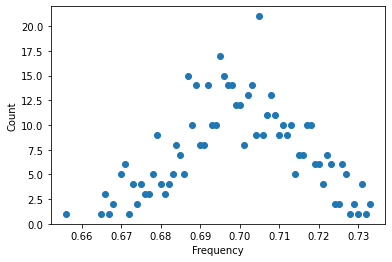

In [70]:
frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]
plt.scatter(frequencies, counts)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

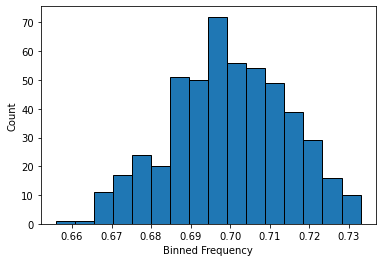

In [71]:
plt.hist(frequency_array, bins='auto', edgecolor='black')
plt.xlabel('Binned Frequency')
plt.ylabel('Count')
plt.show()

Number of Bins: 16


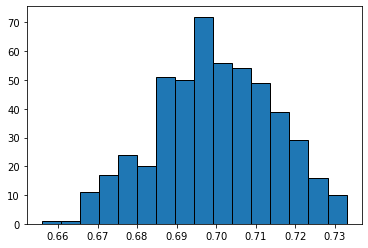

In [72]:
counts, _, _ = plt.hist(frequency_array, bins='auto',
                        edgecolor='black')

print(f"Number of Bins: {counts.size}")

Bin width: 0.004812499999999997


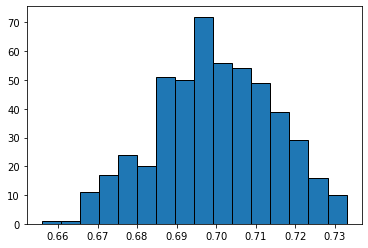

In [73]:
counts, bin_edges, _ = plt.hist(frequency_array, bins='auto',
                                edgecolor='black')

bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")

In [74]:
def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for frequency range {range_string} contains "
           f"{count} element{'' if count == 1 else 's'}"))

output_bin_coverage(0)
output_bin_coverage(5)

The bin for frequency range 0.656 - 0.6608125 contains 1 element
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements


In [75]:
assert counts[counts.argmax()] == counts.max()

In [76]:
output_bin_coverage(counts.argmax())

The bin for frequency range 0.6945 - 0.6993125 contains 72 elements


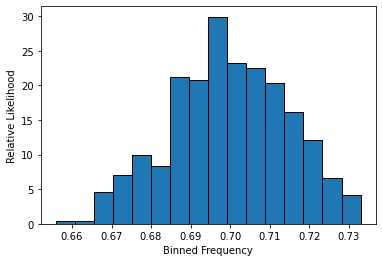

In [77]:
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [78]:
assert likelihoods.sum() * bin_width == 1.0

In [79]:
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144


In [80]:
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index - 1, peak_index + 2)
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


In [81]:
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1

        area = likelihoods[start_index: end_index + 1].sum() * bin_width

    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print((f"The frequency range {range_string} represents a "
           f"{100 * area:.2f}% confidence interval"))
    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.670438 - 0.723375 represents a 95.40% confidence interval


(3, 14)

In [82]:
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

The frequency range 0.670429 - 0.727857 represents a 95.42% confidence interval


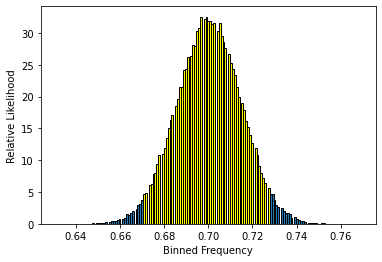

In [83]:
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
                                           edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods,
                                                          bin_width)

for i in range(start_index, end_index):
     patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

The frequency range 0.696229 - 0.704518 represents a 96.22% confidence interval


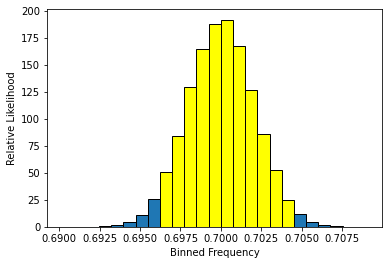

In [84]:
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins=25,
                                           edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods,
                                                          bin_width)

for i in range(start_index, end_index):
     patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

<h2>3.2.4 Computing histograms in NumPy

In [85]:
np.random.seed(0)

likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
                                      density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


(47, 114)

<h2>3.3 Analyse biased deck of cards

In [86]:
np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards + 1)

In [87]:
black_card_count = total_cards - red_card_count
assert black_card_count != red_card_count

In [88]:
weighted_sample_space = {'red_card': red_card_count,
                         'black_card': black_card_count}
prob_red = compute_event_probability(lambda x: x == 'red_card',
                                     weighted_sample_space)

In [89]:
red_card_count

44

In [90]:
assert prob_red == red_card_count / total_cards

In [91]:
np.random.seed(0)
color = 'red' if np.random.binomial(1, prob_red) else 'black'
print(f"The first card in the shuffled deck is {color}")

The first card in the shuffled deck is red


In [92]:
np.random.seed(0)
red_count = np.random.binomial(10, prob_red)
print(f"In {red_count} of out 10 shuffles, a red card came up first.")

In 8 of out 10 shuffles, a red card came up first.


In [93]:
np.random.seed(0)
red_card_count_array = np.random.binomial(50000, prob_red, 100000)
frequency_array = red_card_count_array / 50000

likelihoods, bin_edges = np.histogram(frequency_array, bins='auto',
                                      density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods,
                                                          bin_width)

The frequency range 0.842865 - 0.849139 represents a 95.16% confidence interval


In [94]:
range_start = round(0.842771 * total_cards)
range_end = round(0.849139 * total_cards)
print(f"The number of red cards in the deck is between {range_start} and {range_end}")

The number of red cards in the deck is between 44 and 44


In [95]:
if red_card_count == 44:
    print('We are correct! There are 44 red cards in the deck')
else:
    print('Oops! Our sampling estimation was wrong.')

We are correct! There are 44 red cards in the deck


<h2>3.4 Permutations to shuffle cards

In [96]:
np.random.seed(0)
card_deck = [1, 1, 0, 0]
np.random.shuffle(card_deck)
print(card_deck)

[0, 0, 1, 1]


In [97]:
np.random.seed(0)
unshuffled_deck = [1, 1, 0, 0]
shuffled_deck = np.random.permutation(unshuffled_deck)
assert unshuffled_deck == [1, 1, 0, 0]
print(shuffled_deck)

[0 0 1 1]


In [98]:
import itertools
for permutation in list(itertools.permutations(unshuffled_deck))[:3]:
    print(permutation)

(1, 1, 0, 0)
(1, 1, 0, 0)
(1, 0, 1, 0)


In [99]:
for permutation in list(itertools.permutations([0, 1, 2, 3]))[:3]:
    print(permutation)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)


In [100]:
weighted_sample_space = defaultdict(int)
for permutation in itertools.permutations(unshuffled_deck):
    weighted_sample_space[permutation] += 1

for permutation, count in weighted_sample_space.items():
    print(f"Permutation {permutation} occurs {count} times")

Permutation (1, 1, 0, 0) occurs 4 times
Permutation (1, 0, 1, 0) occurs 4 times
Permutation (1, 0, 0, 1) occurs 4 times
Permutation (0, 1, 1, 0) occurs 4 times
Permutation (0, 1, 0, 1) occurs 4 times
Permutation (0, 0, 1, 1) occurs 4 times


In [101]:
sample_space = set(itertools.permutations(unshuffled_deck))
event_condition = lambda x: list(x) == unshuffled_deck
prob = compute_event_probability(event_condition, sample_space)
assert prob == 1 / len(sample_space)
print(f"Probability that a shuffle does not alter the deck is {prob}")

Probability that a shuffle does not alter the deck is 0.16666666666666666


In [102]:
red_cards = 5 * [1]
black_cards = 5 * [0]
unshuffled_deck = red_cards + black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
print(f"Sample space for a 10-card deck contains {len(sample_space)} elements")

Sample space for a 10-card deck contains 252 elements


<h1>4. Solution

In [103]:
red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards
np.random.seed(0)
shuffled_deck = np.random.permutation(unshuffled_deck)

In [104]:
remaining_red_cards = 26
for i, card in enumerate(shuffled_deck[:-1]):
    remaining_red_cards -= card
    remaining_total_cards = 52 - i
    if remaining_red_cards / remaining_total_cards > 0.5:
        break

print(f"Stopping the game at index {i}.")
final_card = shuffled_deck[i + 1]
color = 'red' if final_card else 0
print(f"The next card in the deck is {'red' if final_card else 'black'}.")
print(f"We have {'won' if final_card else 'lost'}!")

Stopping the game at index 1.
The next card in the deck is red.
We have won!


In [105]:
np.random.seed(0)
total_cards = 52
total_red_cards = 26
def execute_strategy(min_fraction_red=0.5, shuffled_deck=None,
                     return_index=False):
    if shuffled_deck is None:

        shuffled_deck = np.random.permutation(unshuffled_deck)
    remaining_red_cards = total_red_cards

    for i, card in enumerate(shuffled_deck[:-1]):
        remaining_red_cards -= card
        fraction_red_cards = remaining_red_cards / (total_cards - i)
        if fraction_red_cards > min_fraction_red:
            break

    return (i+1, shuffled_deck[i+1]) if return_index else shuffled_deck[i+1]

In [106]:
observations = np.array([execute_strategy() for _ in range(1000)])
frequency_wins = observations.sum() / 1000
assert frequency_wins == observations.mean()
print(f"The frequency of wins is {frequency_wins}")

The frequency of wins is 0.524


In [107]:
dollars_won = frequency_wins * 1000
dollars_lost = (1 - frequency_wins) * 1000
total_profit = dollars_won - dollars_lost
print(f"Total profit is ${total_profit}")

Total profit is $48.0


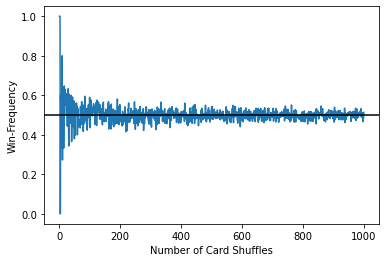

The win-frequency for 10,000 shuffles is 0.5135135135135135


In [109]:
np.random.seed(0)
def repeat_game(number_repeats):
    observations = np.array([execute_strategy()
                             for _ in range(number_repeats)])
    return observations.mean()

frequencies = []
for i in range(1, 1000):
    frequencies.append(repeat_game(i))

plt.plot(list(range(1, 1000)), frequencies)
plt.axhline(.5, color='k')
plt.xlabel('Number of Card Shuffles')
plt.ylabel('Win-Frequency')
plt.show()
print(f"The win-frequency for 10,000 shuffles is {frequencies[-1]}")

The frequency range 0.488687 - 0.510275 represents a 96.67% confidence interval


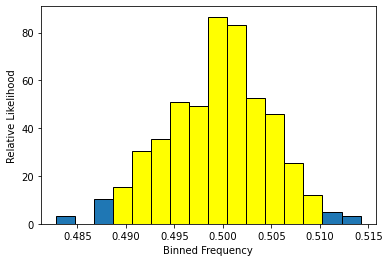

In [110]:
np.random.seed(0)
frequency_array = np.array([repeat_game(10000) for _ in range(300)])

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
                                           edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
     patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')

plt.show()

In [111]:
def scan_strategies():
    fractions = [value / 100 for value in range(50, 100)]
    probabilities = []
    for frac in fractions:
        win_condition = lambda x: execute_strategy(frac,
                                                   shuffled_deck=np.array(x))
        probabilities.append(compute_event_probability(win_condition,
                                                       sample_space))
    return probabilities

probabilities = scan_strategies()
print(f"Lowest probability of win is {min(probabilities)}")
print(f"Highest probability of win is {max(probabilities)}")

Lowest probability of win is 0.5
Highest probability of win is 0.5


In [112]:
for total_cards in [2, 4, 6, 8]:
    total_red_cards = int(total_cards / 2)
    total_black_cards = total_red_cards
    unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards

    sample_space = set(itertools.permutations(unshuffled_deck))
    probabilities = scan_strategies()
    if all(prob == 0.5 for prob in probabilities):
        print(f"No winning strategy found for deck of size {total_cards}")
    else:
        print(f"Winning strategy found for deck of size {total_cards}")

No winning strategy found for deck of size 2
No winning strategy found for deck of size 4
No winning strategy found for deck of size 6
No winning strategy found for deck of size 8


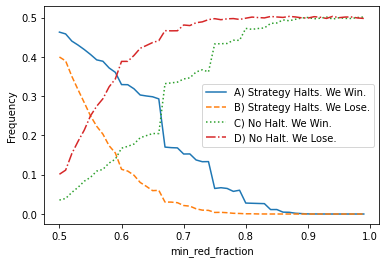

In [113]:
np.random.seed(0)
total_cards = 52
total_red_cards = 26
unshuffled_deck = red_cards + black_cards

def repeat_game_detailed(number_repeats, min_red_fraction):

    observations = [execute_strategy(min_red_fraction, return_index=True)
                    for _ in range(num_repeats)]
    successes = [index for index, card, in observations if card == 1]
    halt_success = len([index for index in successes if index != 51])
    no_halt_success = len(successes) - halt_success

    failures = [index for index, card, in observations if card == 0]
    halt_failure = len([index for index in failures if index != 51])
    no_halt_failure = len(failures) - halt_failure
    result = [halt_success, halt_failure, no_halt_success, no_halt_failure]
    return [r / number_repeats for r in result]

fractions = [value / 100 for value in range(50, 100)]
num_repeats = 50000
result_types = [[], [], [], []]

for fraction in fractions:
    result = repeat_game_detailed(num_repeats, fraction)
    for i in range(4):
        result_types[i].append(result[i])

plt.plot(fractions, result_types[0],
         label='A) Strategy Halts. We Win.')
plt.plot(fractions, result_types[1], linestyle='--',
         label='B) Strategy Halts. We Lose.')
plt.plot(fractions, result_types[2], linestyle=':',
         label='C) No Halt. We Win.')
plt.plot(fractions, result_types[3], linestyle='-.',
         label='D) No Halt. We Lose.')
plt.xlabel('min_red_fraction')
plt.ylabel('Frequency')
plt.legend()
plt.show()